## Lecture 5-1 : Logistic (regression) classification

 - Review : Linear regression

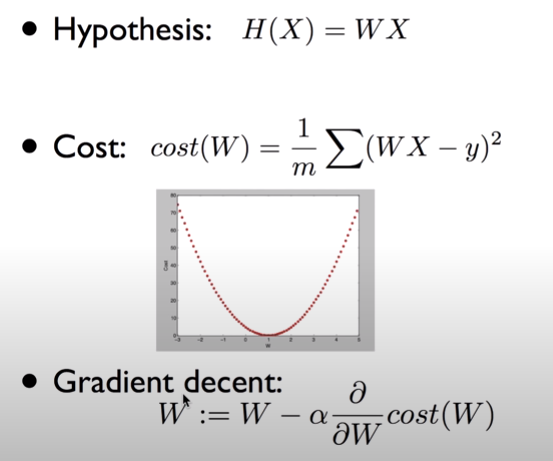

 - 회기 문제가 아닌 분류 문제를 다룰때 선형 함수로는 한계가 있음 <br>
  0과 1로 구분하기가 쉽지 않음

 - 그래서 Logistic function, signoid function 과 같은 형태를 활용함
 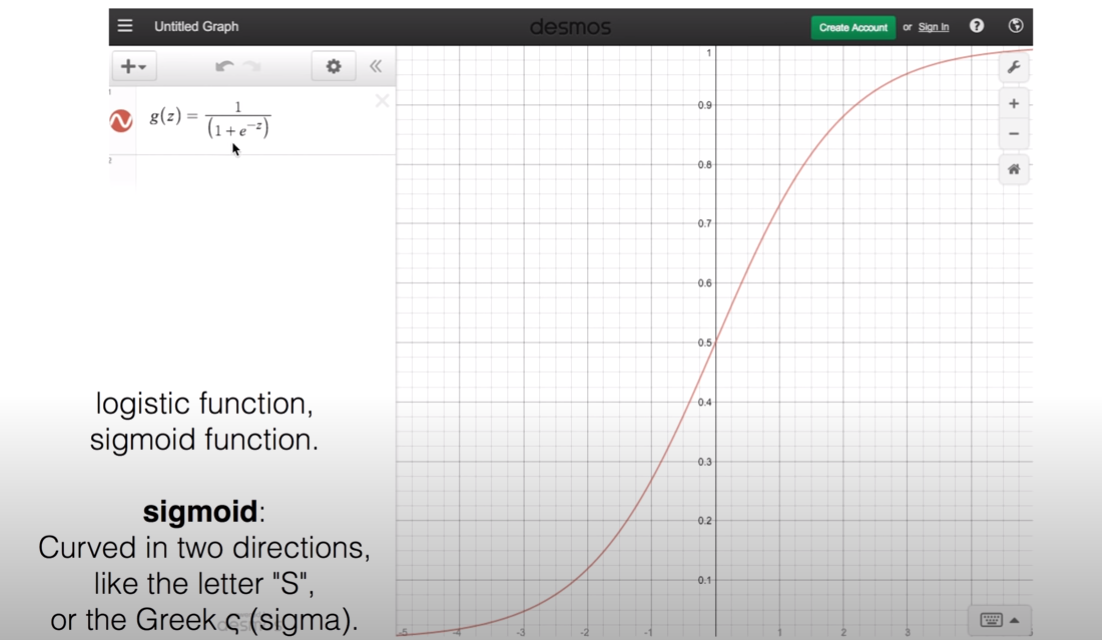

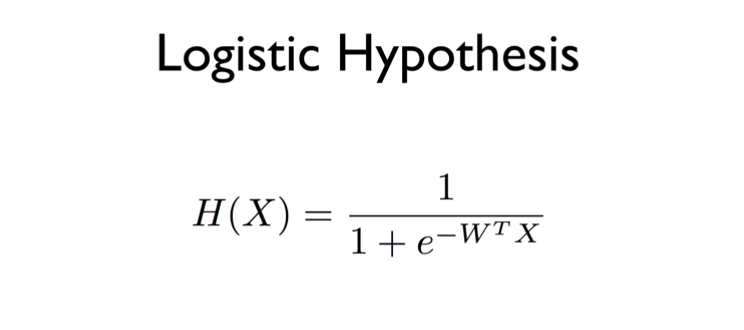

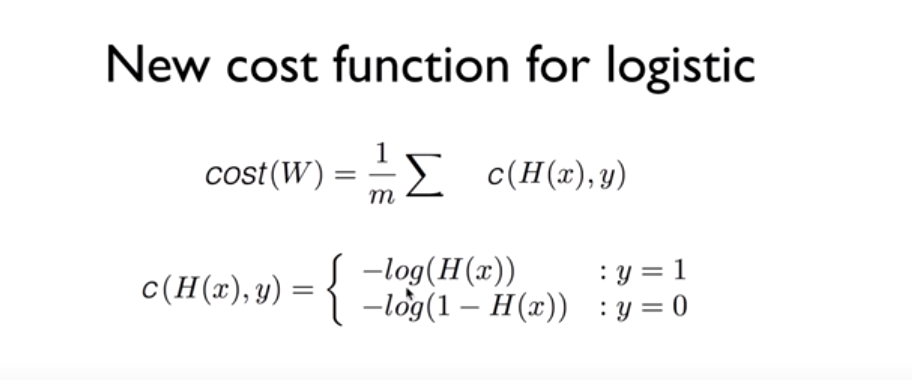

 - 가설H(X)가 바뀌며 사용해야하는 Cost 함수도 변경

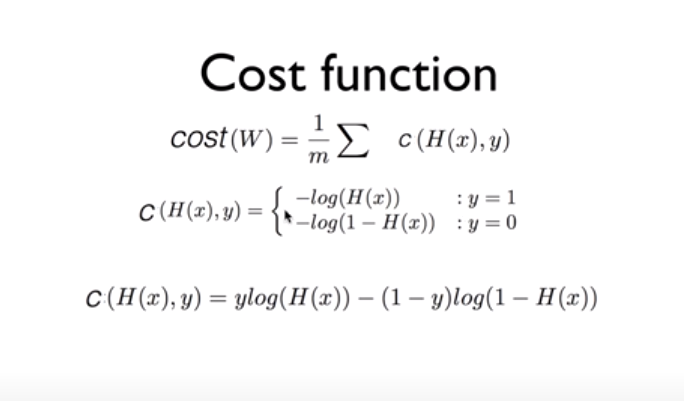

 - 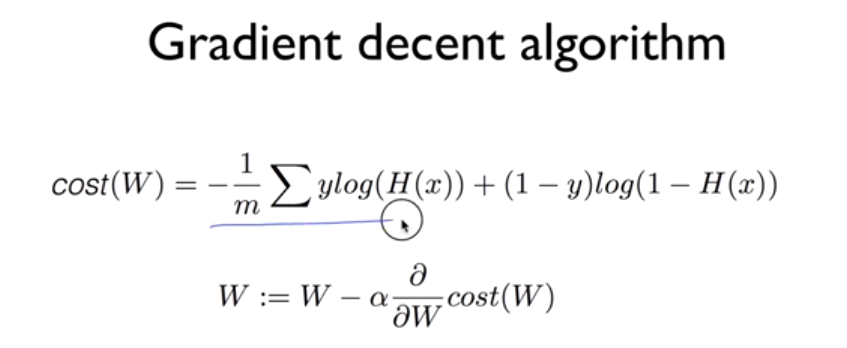

In [1]:
import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph 
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

E:\Anaconda3\envs\tensor1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda3\envs\tensor1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda3\envs\tensor1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda3\envs\tensor1\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

0 1.7307829
200 0.5715118
400 0.5074139
600 0.4718242
800 0.44758478
1000 0.42857102
1200 0.41232458
1400 0.39775515
1600 0.3843379
1800 0.3718011
2000 0.35999322
2200 0.3488221
2400 0.33822623
2600 0.32816055
2800 0.31858906
3000 0.30948088
3200 0.30080855
3400 0.29254702
3600 0.28467286
3800 0.27716395
4000 0.2699997
4200 0.26316053
4400 0.25662813
4600 0.25038514
4800 0.24441506
5000 0.2387027
5200 0.23323362
5400 0.22799426
5600 0.22297196
5800 0.21815471
6000 0.2135315
6200 0.20909168
6400 0.20482552
6600 0.20072377
6800 0.19677766
7000 0.19297926
7200 0.18932097
7400 0.1857955
7600 0.18239637
7800 0.17911713
8000 0.17595182
8200 0.17289507
8400 0.16994143
8600 0.16708624
8800 0.1643247
9000 0.16165252
9200 0.15906553
9400 0.15655991
9600 0.15413195
9800 0.15177833
10000 0.1494956

Hypothesis:  [[0.03074026]
 [0.15884683]
 [0.3048674 ]
 [0.78138196]
 [0.93957496]
 [0.9801688 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0
